In [4]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
 # ['NanumBarunGothic',
 # 'NanumMyeongjo',
 # 'NanumMyeongjo',
 # 'NanumGothic',
 # 'NanumBarunGothic',
 # 'NanumGothic']

['NanumGothic',
 'NanumMyeongjo',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquareRound',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumSquareRound',
 'NanumSquare']

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [6]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

In [7]:
import os
import pandas as pd

os.getcwd()

'/home/piai'

In [8]:
os.chdir('/home/piai/바탕화면/01 실습파일/2. Big Data 분석')

# 실습1 - 군집분석

In [9]:
!pip install yellowbrick

In [10]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

# Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

In [11]:
# df_raw = pd.read_csv("D:/WORK/Data/직무능력평가.csv", engine = "python")
df_raw = pd.read_csv("IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
print(df_raw.dtypes)  # 데이터 타입 확인

SEPAL_LENGTH    float64
SEPAL_WIDTH     float64
PETAL_LENGTH    float64
PETAL_WIDTH     float64
SPECIES          object
dtype: object


In [13]:
print(df_raw['SPECIES'].unique())  # 해당 열의 고유값 확인

['setosa' 'versicolor' 'virginica']


In [14]:
df_raw=df_raw.drop(columns=['SPECIES'])

In [15]:
# 데이터 표준화
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(df_raw)

# 위에서부터 자료 5개 확인
df_raw_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
# 목표 변수:모든 행 & 1번째 열
df_raw_y = df_raw_scaled[:, 0]
# 설명 변수::모든 행 & 1번째 제외한 모든 열
df_raw_x = df_raw_scaled[:,1::]

In [17]:
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [18]:
# 군집 생성 결과 확인
Z_ward

array([[2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.40000000e+01, 9.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [6.60000000e+01, 8.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [0.00000000e+00, 3.60000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.10000000e+01, 2.00000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.70000000e+01, 4.00000000e+01, 5.68374269e-02, 2.00000000e+00],
       [7.10000000e+01, 9.90000000e+01, 5.68374269e-02, 2.00000000e+00],
       [2.60000000e+01, 3.10000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 5.68374269e

Text(0, 0.5, 'Distance')

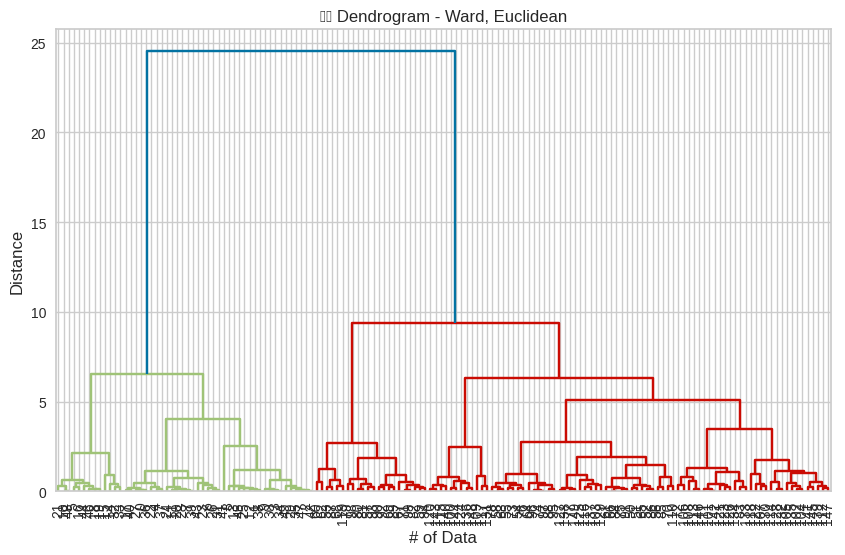

In [19]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

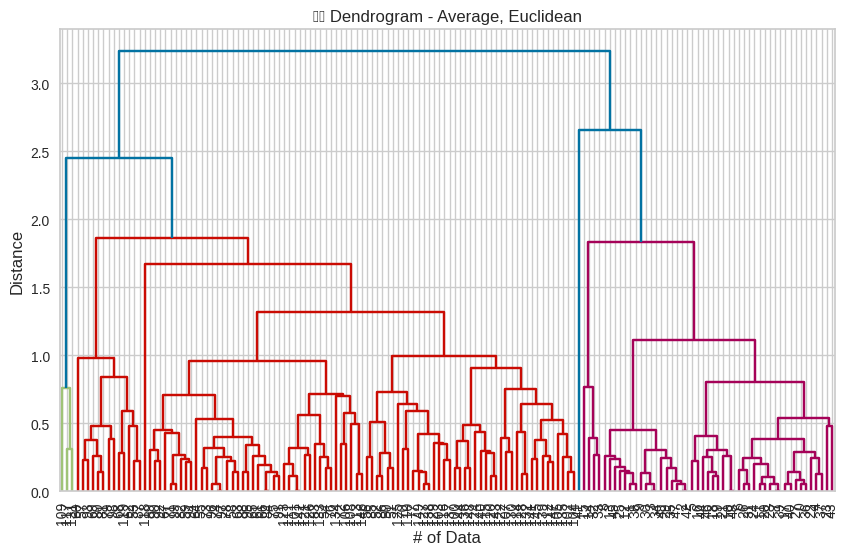

In [20]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111) 
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [21]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


In [22]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,5.1,5.369,5.8,3.7,3.908,4.4,1.2,1.523,1.9,0.1,0.285,0.4
1,2,4.3,4.878,5.5,2.3,3.259,3.6,1.0,1.441,1.9,0.1,0.232,0.6
2,3,4.9,5.605,6.3,2.0,2.473,2.8,3.0,3.932,5.0,1.0,1.186,1.5
3,4,6.2,6.817,7.9,3.1,3.383,3.8,5.3,5.842,6.7,2.0,2.317,2.5
4,5,5.4,6.258,7.2,2.8,3.014,3.4,3.6,4.717,6.0,1.2,1.522,2.0
5,6,4.9,6.527,7.7,2.5,2.790,3.1,4.5,5.473,6.9,1.4,1.963,2.4


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

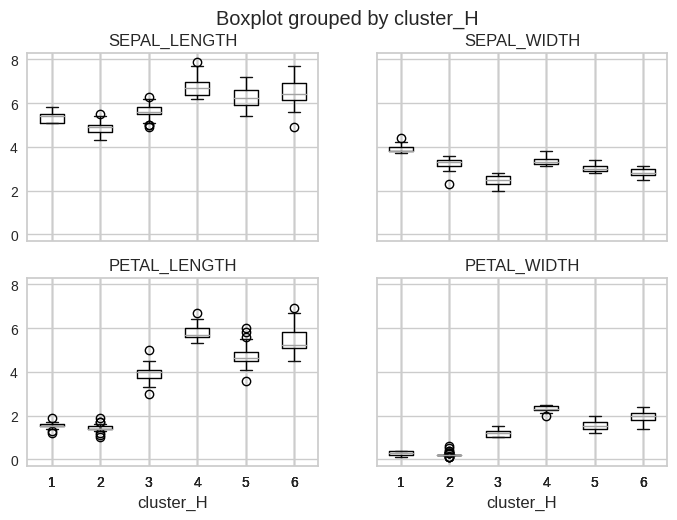

In [23]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

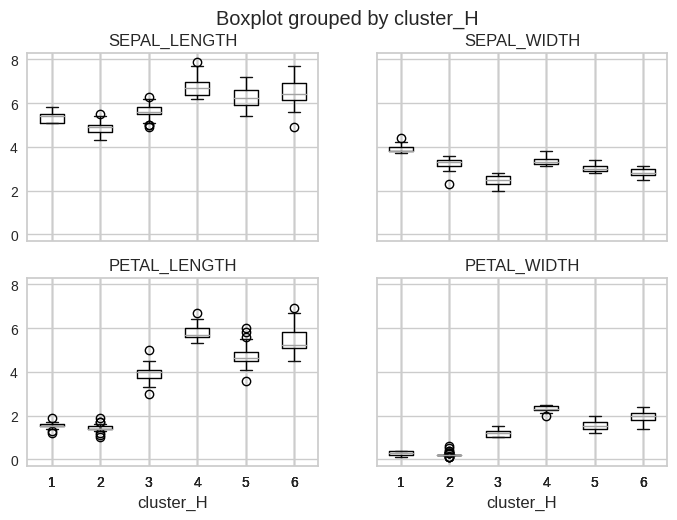

In [24]:
# Boxplot을 활용한 군집별 변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

In [25]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

,NumberofCluster,Error
0,1,450.000
1,2,149.564
2,3,95.319
3,4,74.244
4,5,57.272
5,6,45.851
6,7,39.263
7,8,34.429
8,9,29.642
9,10,27.179


Text(0, 0.5, 'Sum of Square')

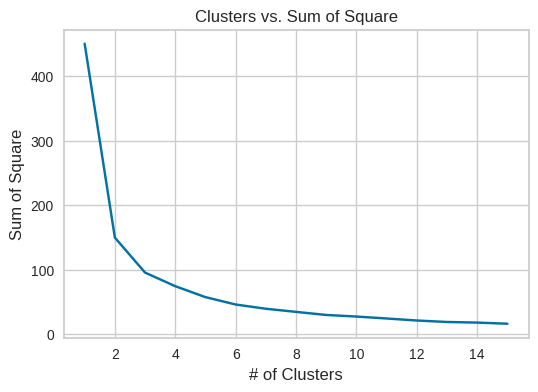

In [26]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [27]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,2,1
1,4.9,3.0,1.4,0.2,2,1
2,4.7,3.2,1.3,0.2,2,1
3,4.6,3.1,1.5,0.2,2,1
4,5.0,3.6,1.4,0.2,2,3
5,5.4,3.9,1.7,0.4,1,3
6,4.6,3.4,1.4,0.3,2,1
7,5.0,3.4,1.5,0.2,2,1
8,4.4,2.9,1.4,0.2,2,1
9,4.9,3.1,1.5,0.1,2,1


In [28]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,1,4.3,4.894,5.5,2.9,3.258,3.5,1.1,1.461,1.9,0.1,0.236,0.6
1,2,4.9,6.231,7.7,2.5,2.847,3.2,3.6,4.887,6.9,1.2,1.616,2.4
2,3,4.6,5.269,5.8,3.6,3.850,4.4,1.0,1.475,1.9,0.1,0.262,0.4
3,4,5.9,6.770,7.9,3.0,3.230,3.8,4.5,5.611,6.7,1.6,2.144,2.5
4,5,4.5,5.537,6.3,2.0,2.405,2.7,1.3,3.768,5.0,0.3,1.111,1.5


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

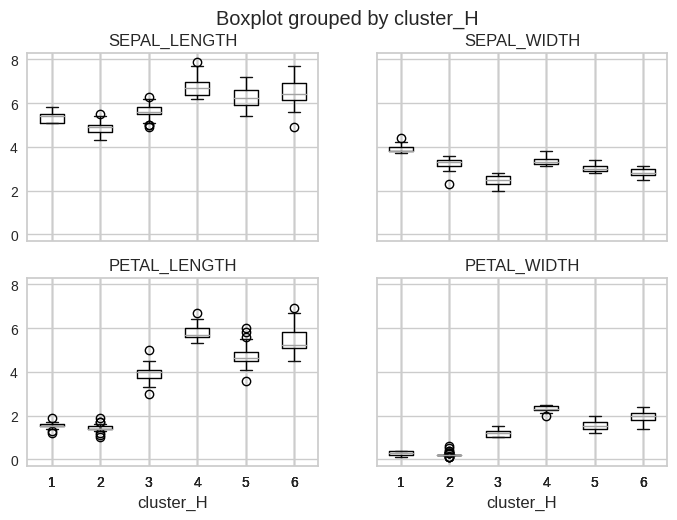

In [29]:
# Boxplot을 활용한 군집별 tjfaud변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_H")

In [30]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.462
계층형(군집 수=4) 실루엣 계수 =  0.414


In [31]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.48
k-평균(군집 수=4) 실루엣 계수 =  0.415


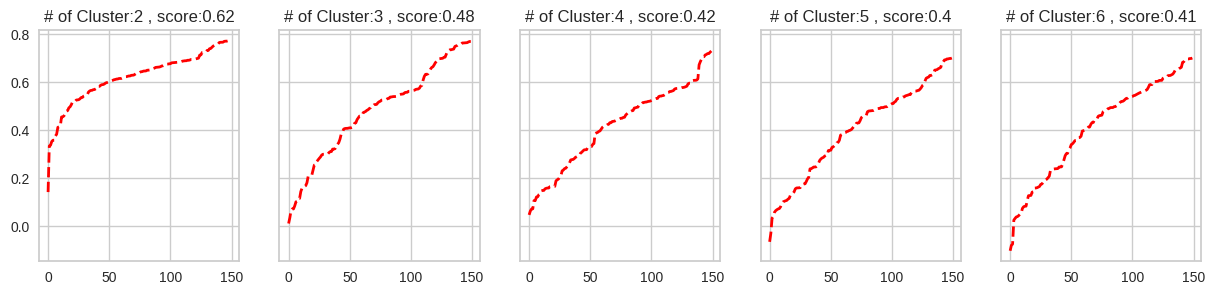

In [32]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)
    
    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

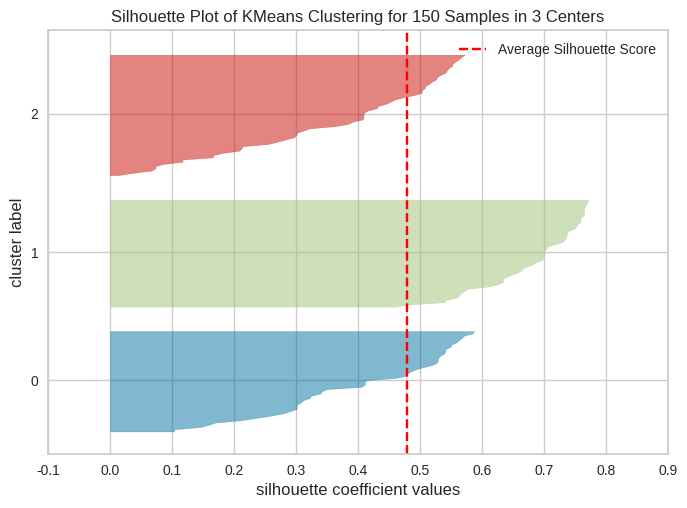

실루엣 계수 =  0.4796


In [33]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

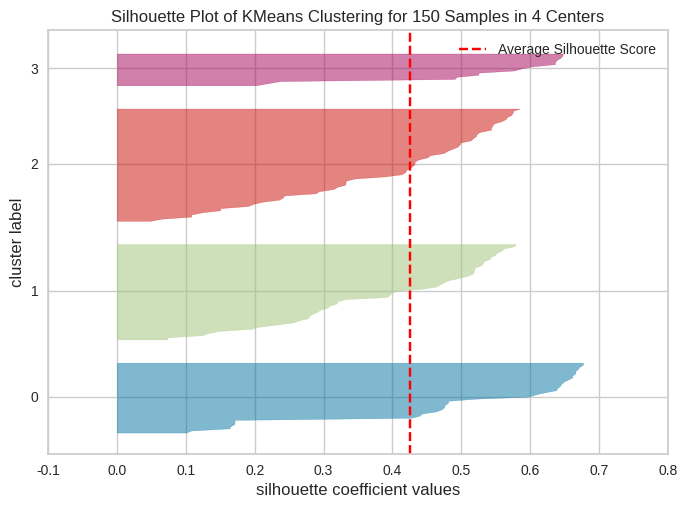

실루엣 계수 =  0.4258


In [34]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

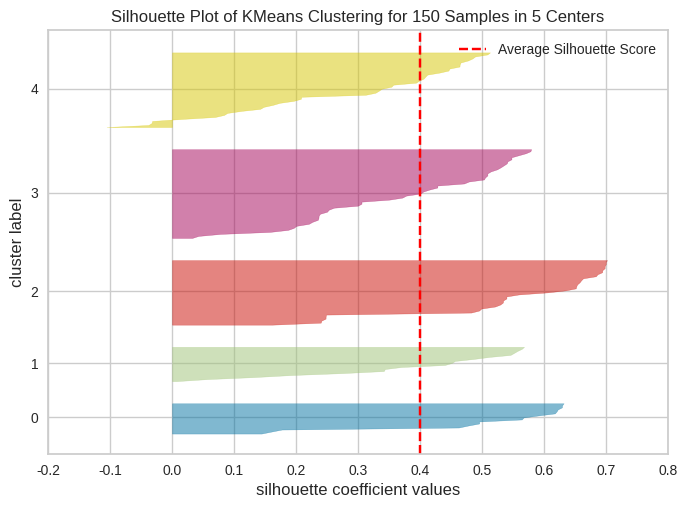

실루엣 계수 =  0.4006


In [35]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력 
graph_sil.fit(df_raw_x)      
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

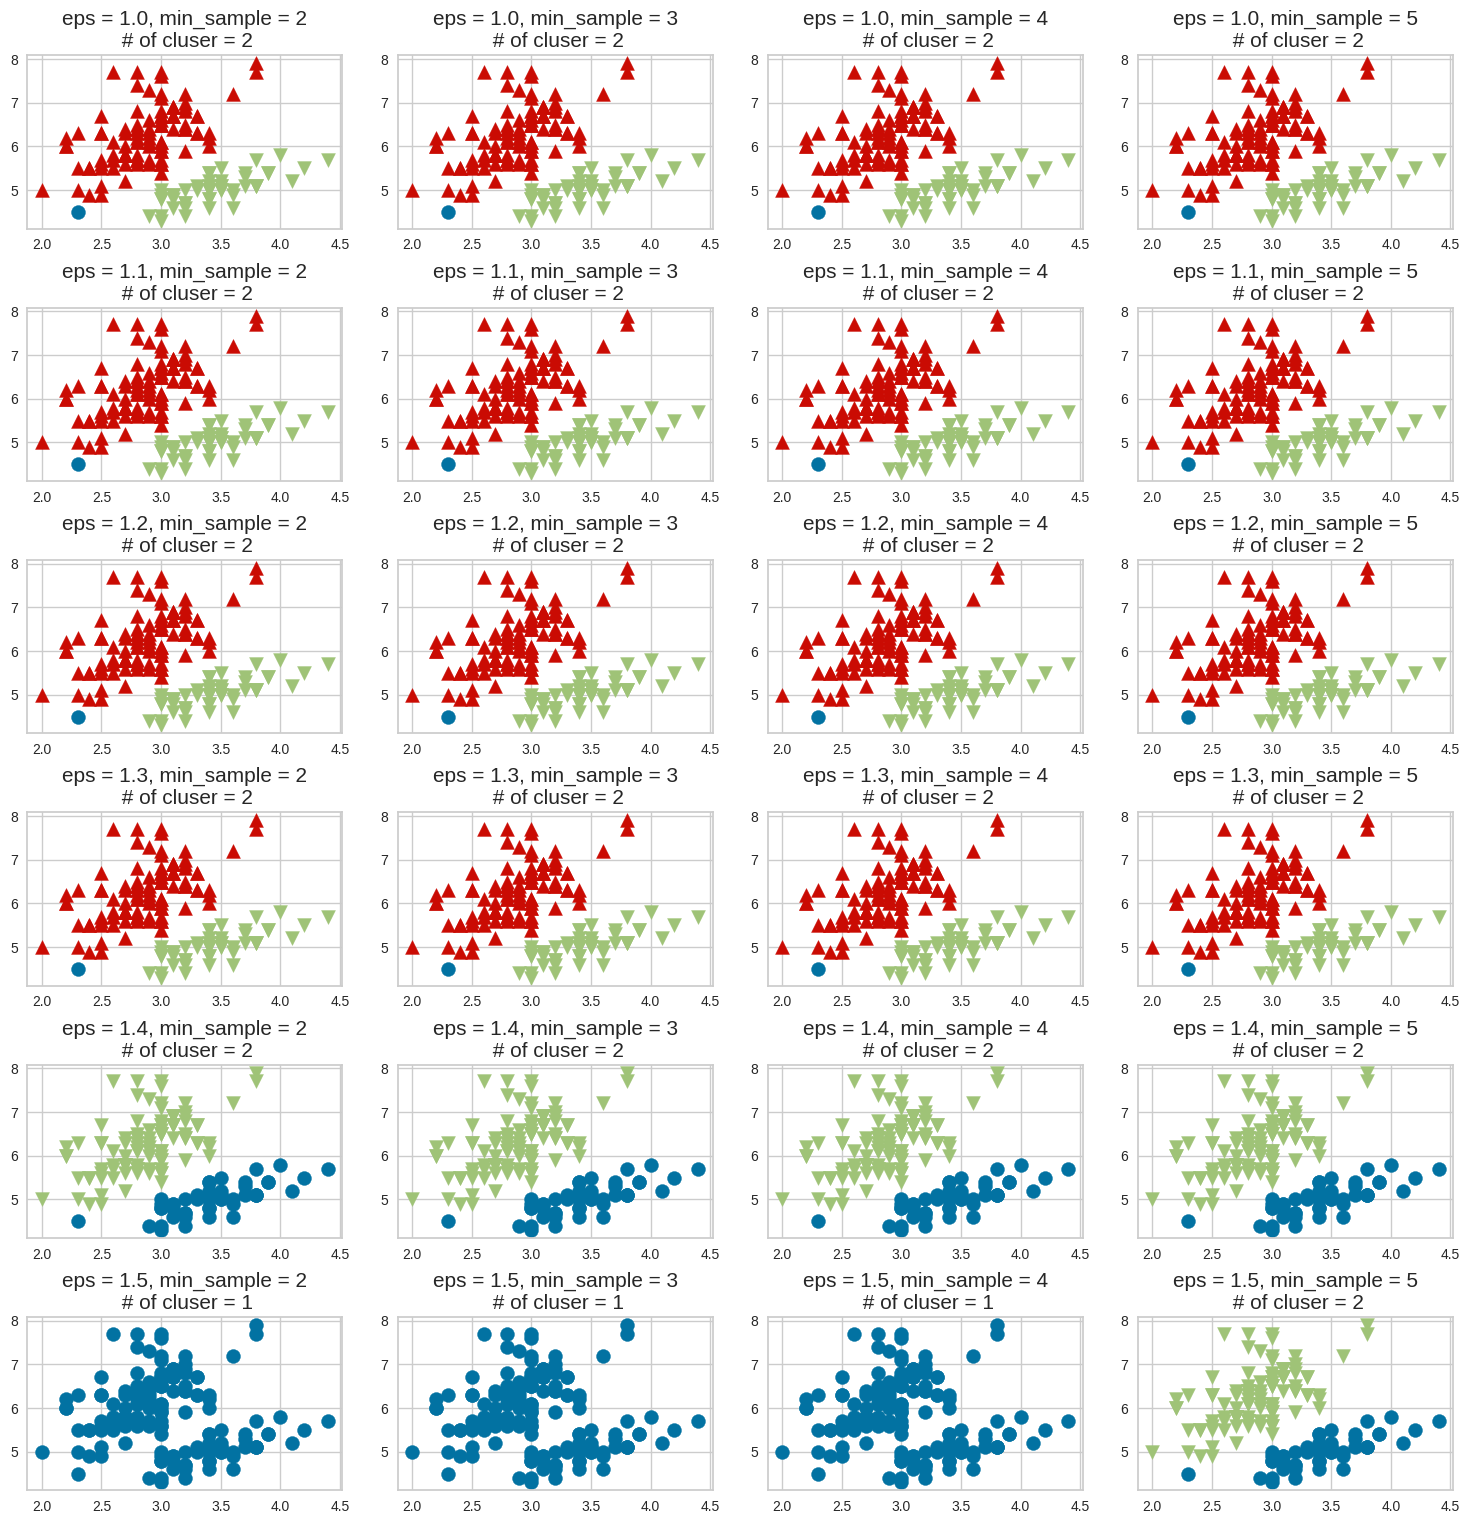

In [36]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["SEPAL_WIDTH"]
Y = df_raw["SEPAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)

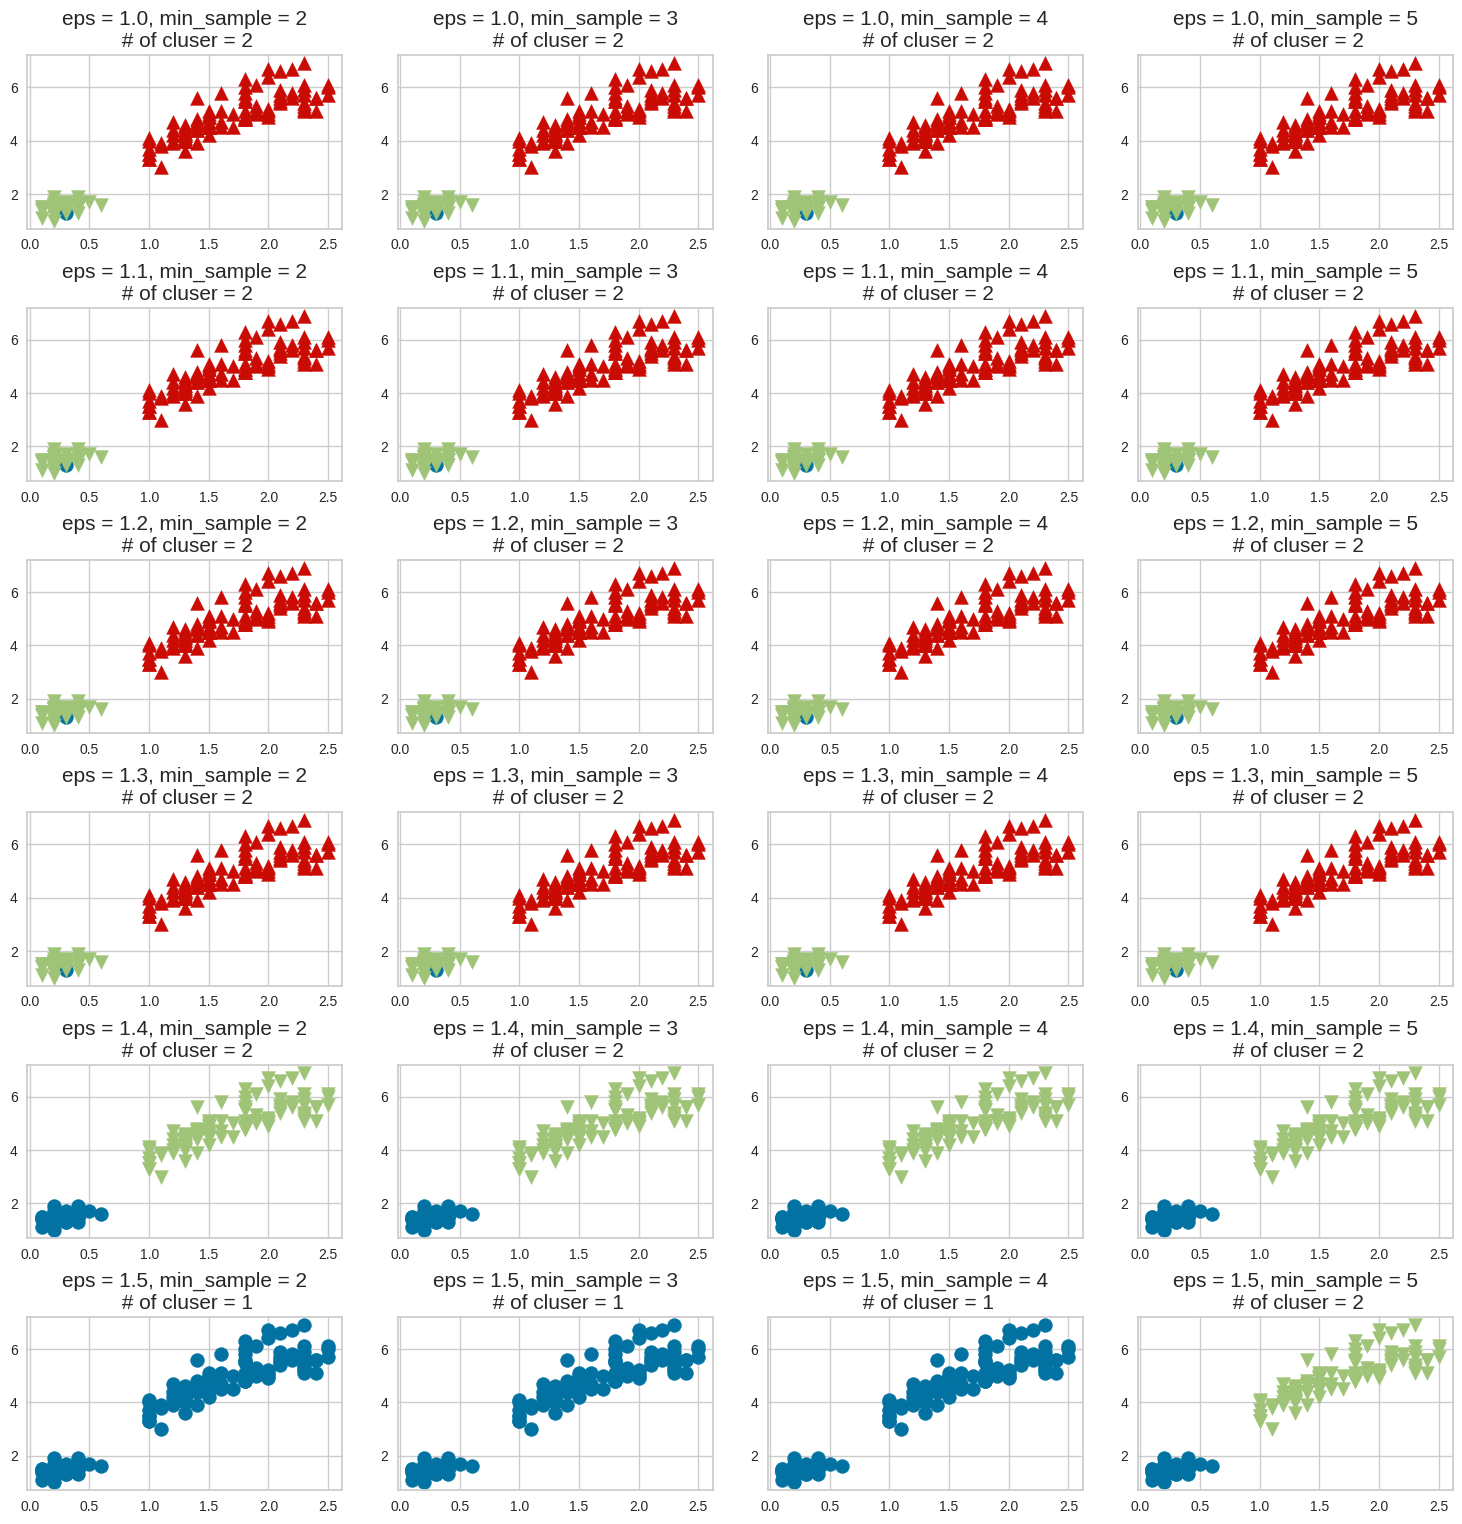

In [37]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["PETAL_WIDTH"]
Y = df_raw["PETAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)

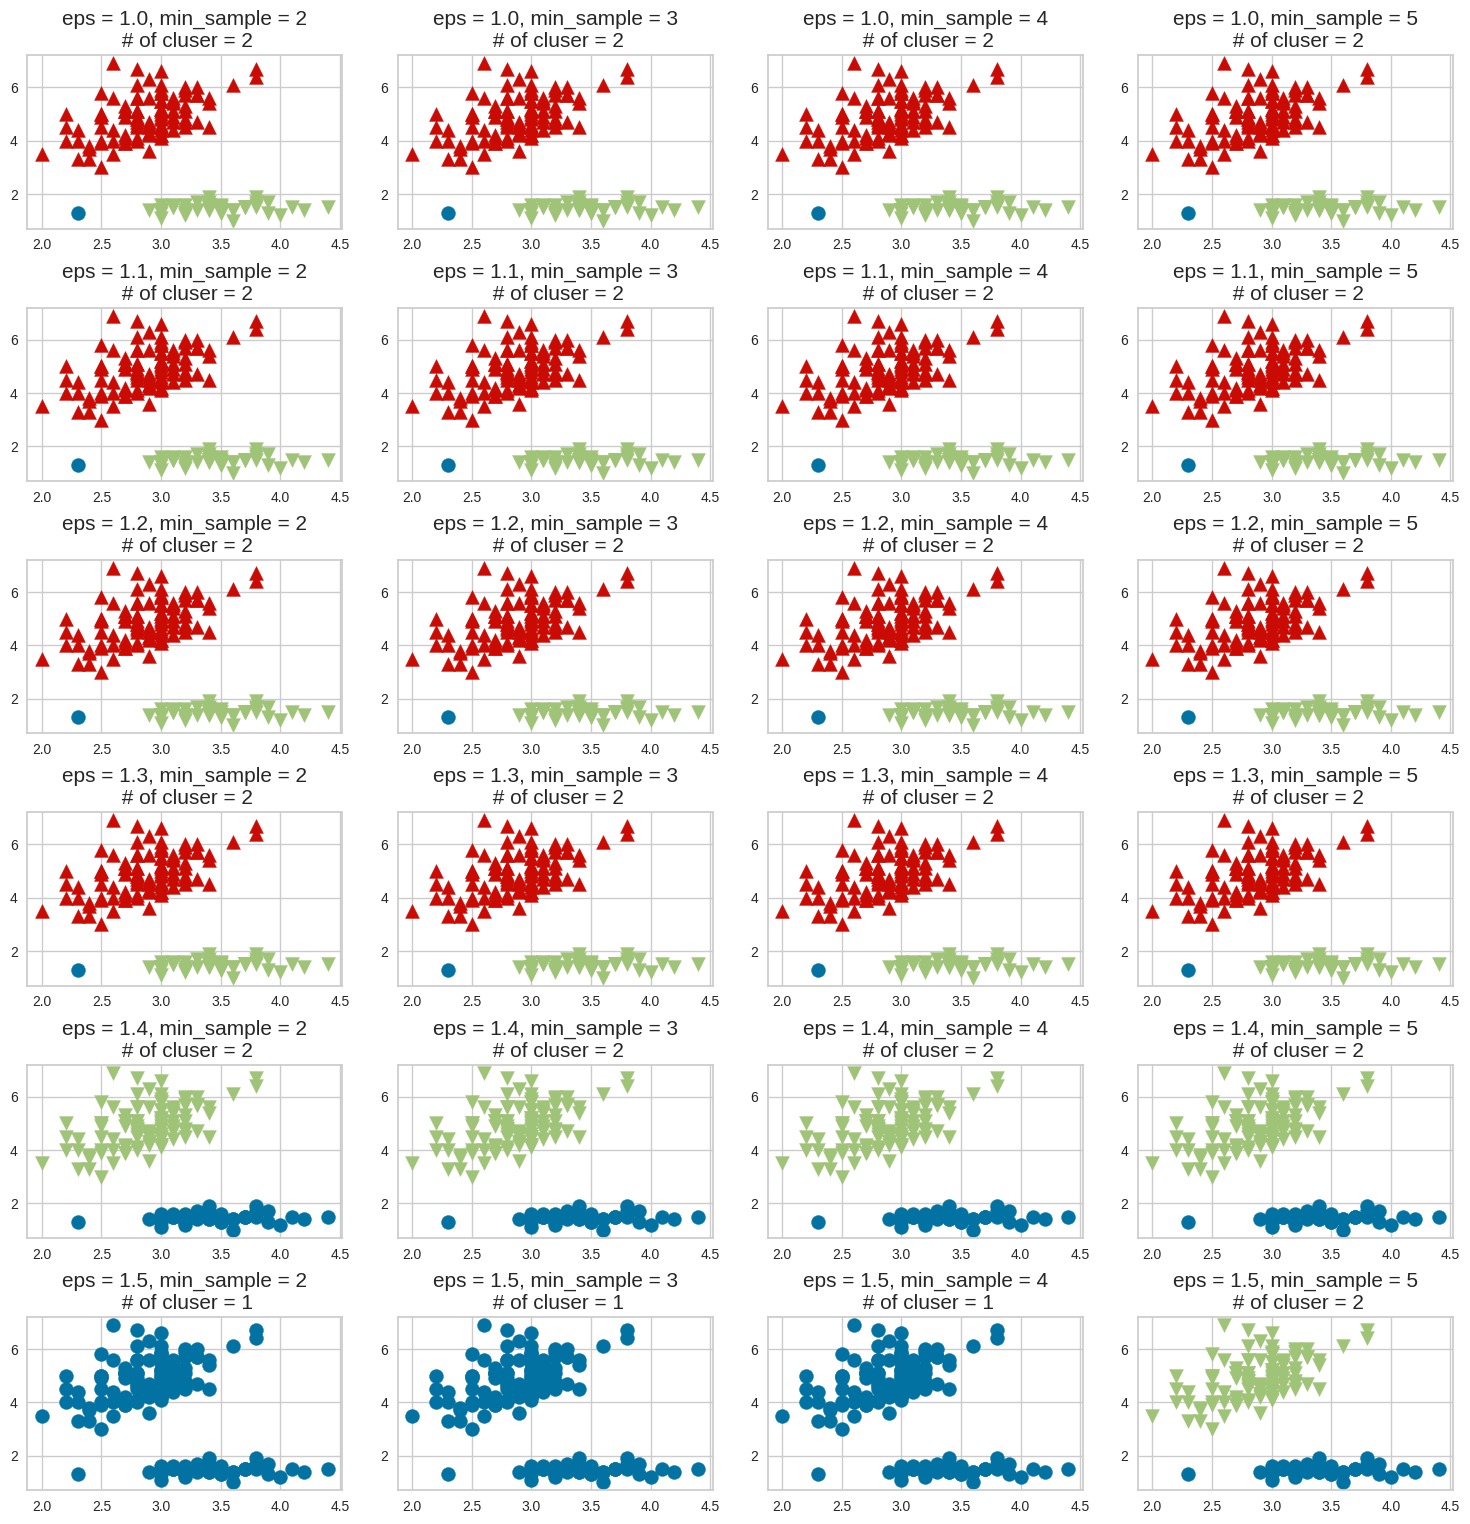

In [38]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["SEPAL_WIDTH"]
Y = df_raw["PETAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)

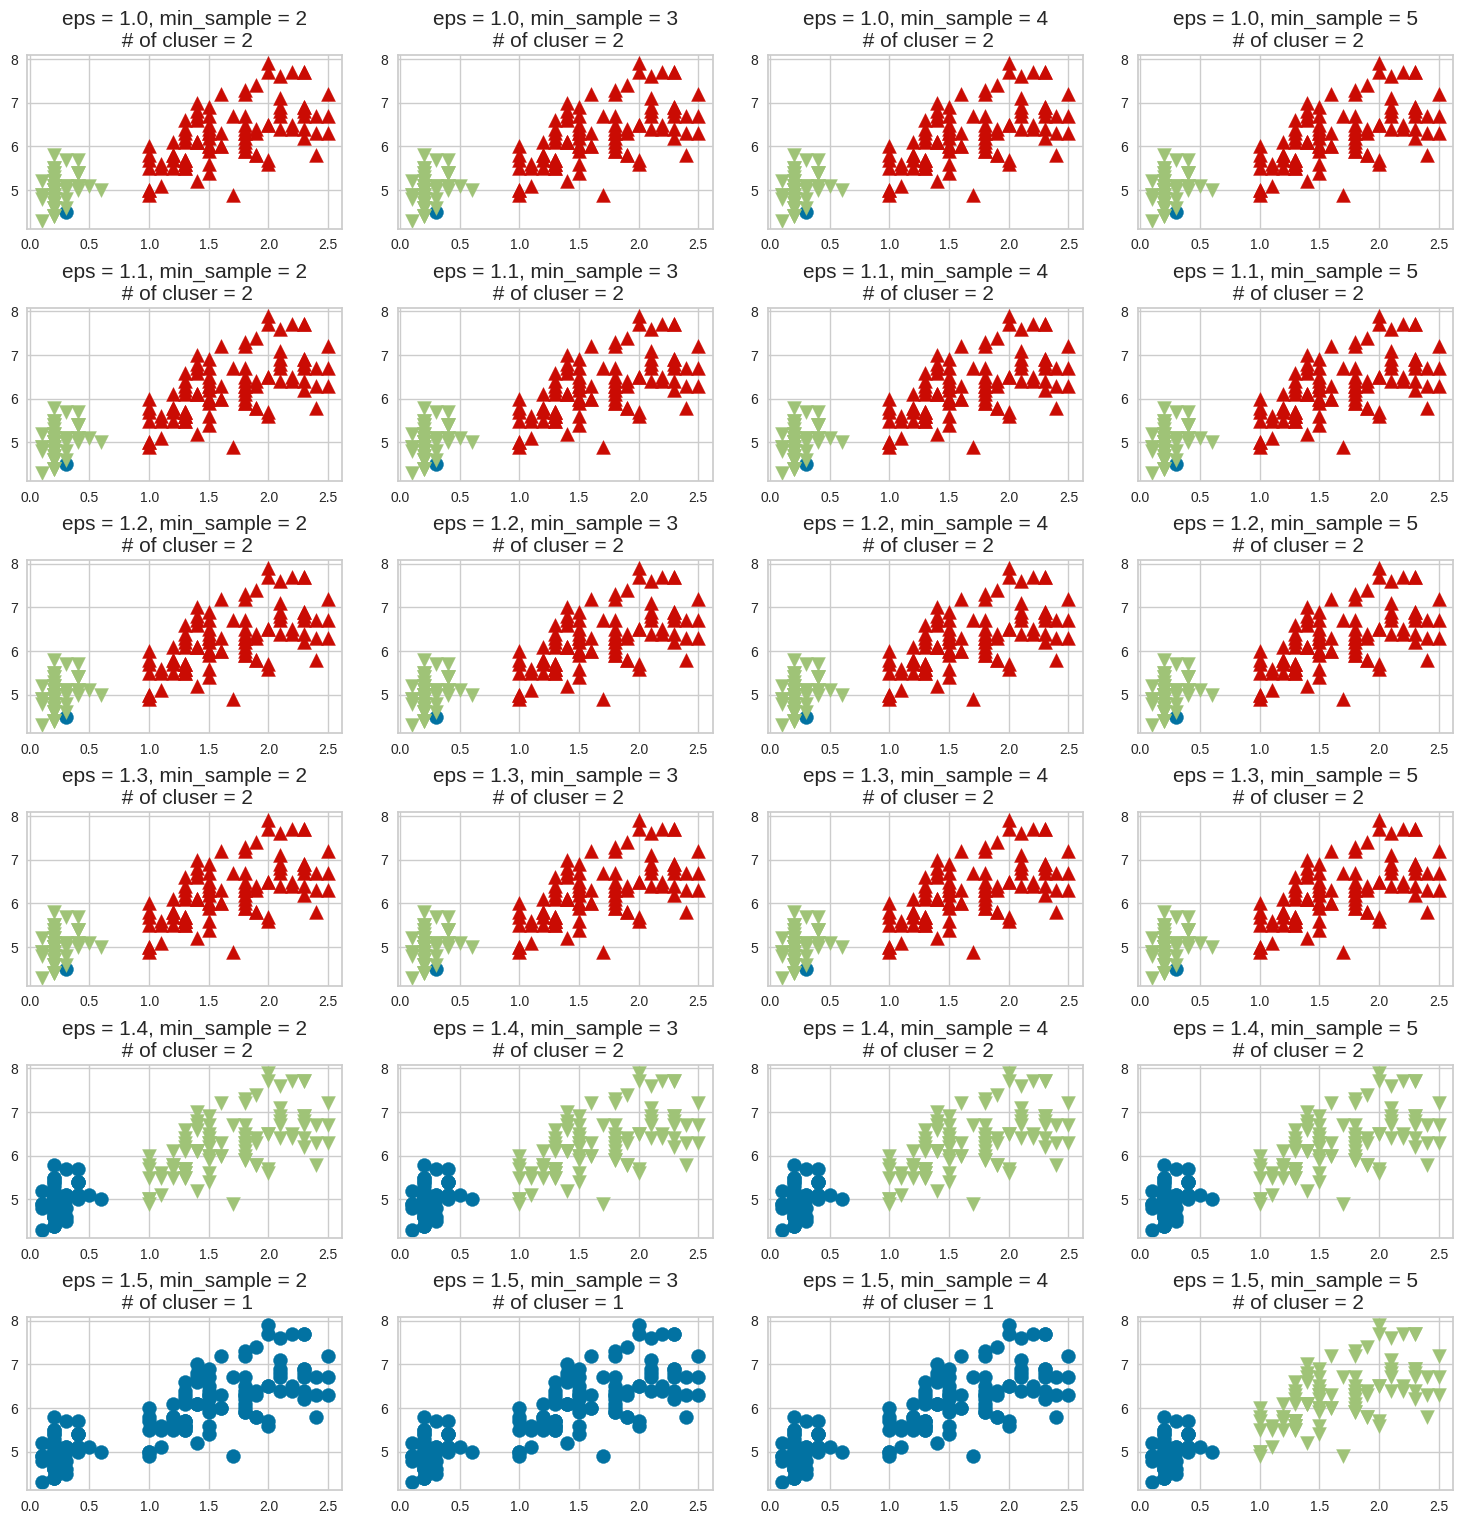

In [39]:
# X축: DISSATIS 변수, Y축: CHANCE
X = df_raw["PETAL_WIDTH"]
Y = df_raw["SEPAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)

In [40]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.2, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_DB = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,cluster_H,cluster_KM,cluster_DB
0,5.1,3.5,1.4,0.2,2,1,1
1,4.9,3.0,1.4,0.2,2,1,1
2,4.7,3.2,1.3,0.2,2,1,1
3,4.6,3.1,1.5,0.2,2,1,1
4,5.0,3.6,1.4,0.2,2,3,1


In [41]:
# DB 스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"],
                                   axis = 1,
                                   inplace=False).\
                groupby("cluster_DB").agg(["min", "mean", "max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)

,cluster_DB,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max
0,0,4.5,4.500,4.5,2.3,2.300,2.3,1.3,1.300,1.3,0.3,0.300,0.3
1,1,4.3,5.016,5.8,2.9,3.451,4.4,1.0,1.465,1.9,0.1,0.245,0.6
2,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5


# 실습2 - 연관규칙

In [68]:
%matplotlib inline 

# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
import matplotlib.pyplot as plt
# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [69]:
!pip install mlxtend

In [70]:
df_raw = pd.read_csv("구매이력.csv", encoding='euc-kr')
df_raw.head(10)

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주
5,CS-104,크래커
6,CS-104,맥주
7,CS-106,양주
8,CS-106,크래커
9,CS-107,맥주


In [71]:
# 고객 ID 리스트 행성 및 정렬
ID = list(set(df_raw["ID"]))
ID.sort()

# 고객ID별 상품 매칭
list_association = []
for i in ID:
    # ID별 구매 데이터 추출
    tmp_list = list(df_raw[df_raw["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    # ID별 구매 데이터를 리스트에 담기
    list_association.append(tmp_list)

# 리스트 출력
for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [72]:
# Items 기준으로 포함 여부에 따라 True/False 로 변환
enc = TransactionEncoder()
df_raw_enc = enc.fit_transform(X = list_association)

# 함수 fit_transform 는 데이터를 행렬의 형태로 반환, pandas의 DataFrame의 형태로 변환
df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)

df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


In [84]:
# 규칙 선택 최소 지지
v_min_support = 0.1

# 연관규칙 생성 및 지지도 임계값 적용
# df_freq = apriori(df_asso, min_support = 0.4, use_colnames = True)  # 직접 입력 
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True) # 매개값 사용

# itemsets 항목 확인
df_freq.round(3) 
# df_freq[9:16].round(3) # 부분 확인

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.279,"(맥주, 소다)"
6,0.233,"(맥주, 양주)"
7,0.256,"(맥주, 콜라)"
8,0.395,"(맥주, 크래커)"
9,0.233,"(소다, 양주)"


In [85]:
#향상도 기준 : lift
df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 1)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(소다),0.744,0.349,0.279,0.375,1.075,0.019,1.042,0.273
1,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
2,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
3,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
4,(소다),(양주),0.349,0.442,0.233,0.667,1.509,0.078,1.674,0.518
5,(양주),(소다),0.442,0.349,0.233,0.526,1.509,0.078,1.375,0.604
6,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554
7,(크래커),(소다),0.512,0.349,0.279,0.545,1.564,0.101,1.433,0.738
8,(양주),(크래커),0.442,0.512,0.256,0.579,1.132,0.030,1.160,0.208
9,(크래커),(양주),0.512,0.442,0.256,0.500,1.132,0.030,1.116,0.238


In [86]:
#신뢰도 기준:confidence
df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.7)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
1,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
2,(소다),(크래커),0.349,0.512,0.279,0.800,1.564,0.101,2.442,0.554
3,"(맥주, 양주)",(소다),0.233,0.349,0.186,0.800,2.293,0.105,3.256,0.735
4,"(소다, 양주)",(맥주),0.233,0.744,0.186,0.800,1.075,0.013,1.279,0.091
5,"(소다, 크래커)",(맥주),0.279,0.744,0.233,0.833,1.120,0.025,1.535,0.148
6,"(맥주, 소다)",(크래커),0.279,0.512,0.233,0.833,1.629,0.090,2.930,0.535
7,"(맥주, 양주)",(크래커),0.233,0.512,0.186,0.800,1.564,0.067,2.442,0.470
8,"(양주, 크래커)",(맥주),0.256,0.744,0.186,0.727,0.977,-0.004,0.938,-0.030
9,"(소다, 양주)",(크래커),0.233,0.512,0.209,0.900,1.759,0.090,4.884,0.562
